In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [136]:
full_df = pd.read_csv(open("/Users/RyanHaver/Projects/cryptoStrategies/full_data.csv"))
full_df.drop(columns=['open_time', 'close_time', 'count', 'taker_buy_base_volume', 'taker_buy_quote_volume'], inplace=True)
full_df.head()

,open,high,low,close,volume,quote_volume
0,8548.70,8637.76,8548.70,8628.42,0.202100,1737.6142
1,8638.78,8646.56,8625.83,8625.83,0.018900,163.1756
2,8588.22,8591.65,8588.22,8591.65,0.033354,286.5019
3,8605.05,8631.37,8595.12,8631.37,0.521172,4490.0216
4,8631.37,8631.37,8631.37,8631.37,0.000000,0.0000


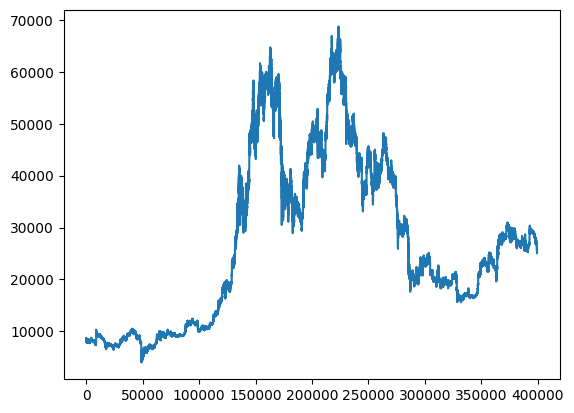

In [92]:
plt.plot(full_df['close'].to_list())
plt.show()

In [139]:
window_size = 10
# Does using open and close prices actually give me any more information?
full_df['close_change'] = full_df['close'].diff()
full_df['open_change'] = full_df['open'].diff()
full_df['positive_close'] = full_df['close_change'] > 0
full_df['positive_open'] = full_df['open_change'] > 0
close_previous_window = full_df['positive_close'].rolling(window=window_size, min_periods=window_size).sum().shift(1-window_size) == window_size
open_previous_window = full_df['positive_open'].rolling(window=window_size, min_periods=window_size).sum().shift(1-window_size) == window_size
full_df['trend_close'] = close_previous_window
full_df['trend_open'] = open_previous_window
full_df.reset_index(inplace=True)
full_df

,level_0,index,open,high,low,close,volume,quote_volume,close_change,open_change,positive_close,positive_open,trend_close,trend_open
0,0,0,8548.70,8637.76,8548.70,8628.42,0.202100,1737.614200,NaN,NaN,False,False,False,False
1,1,1,8638.78,8646.56,8625.83,8625.83,0.018900,163.175600,-2.59,90.08,False,True,False,False
2,2,2,8588.22,8591.65,8588.22,8591.65,0.033354,286.501900,-34.18,-50.56,False,False,False,False
3,3,3,8605.05,8631.37,8595.12,8631.37,0.521172,4490.021600,39.72,16.83,True,True,False,False
4,4,4,8631.37,8631.37,8631.37,8631.37,0.000000,0.000000,0.00,26.32,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399248,399248,31,25301.01,25468.59,25101.01,25101.01,2.758760,69555.219855,-200.00,-198.99,False,False,False,False
399249,399249,32,25101.01,26459.02,25001.00,25196.00,6.245420,158555.791356,94.99,-200.00,True,False,False,False
399250,399250,33,25241.24,25493.65,25001.02,25115.01,2.081300,52313.419493,-80.99,140.23,False,True,False,False
399251,399251,34,25199.29,25241.24,25000.00,25025.00,2.830070,70992.712009,-90.01,-41.95,False,False,False,False


Text(0.5, 1.0, 'Values with Uptrends Highlighted')

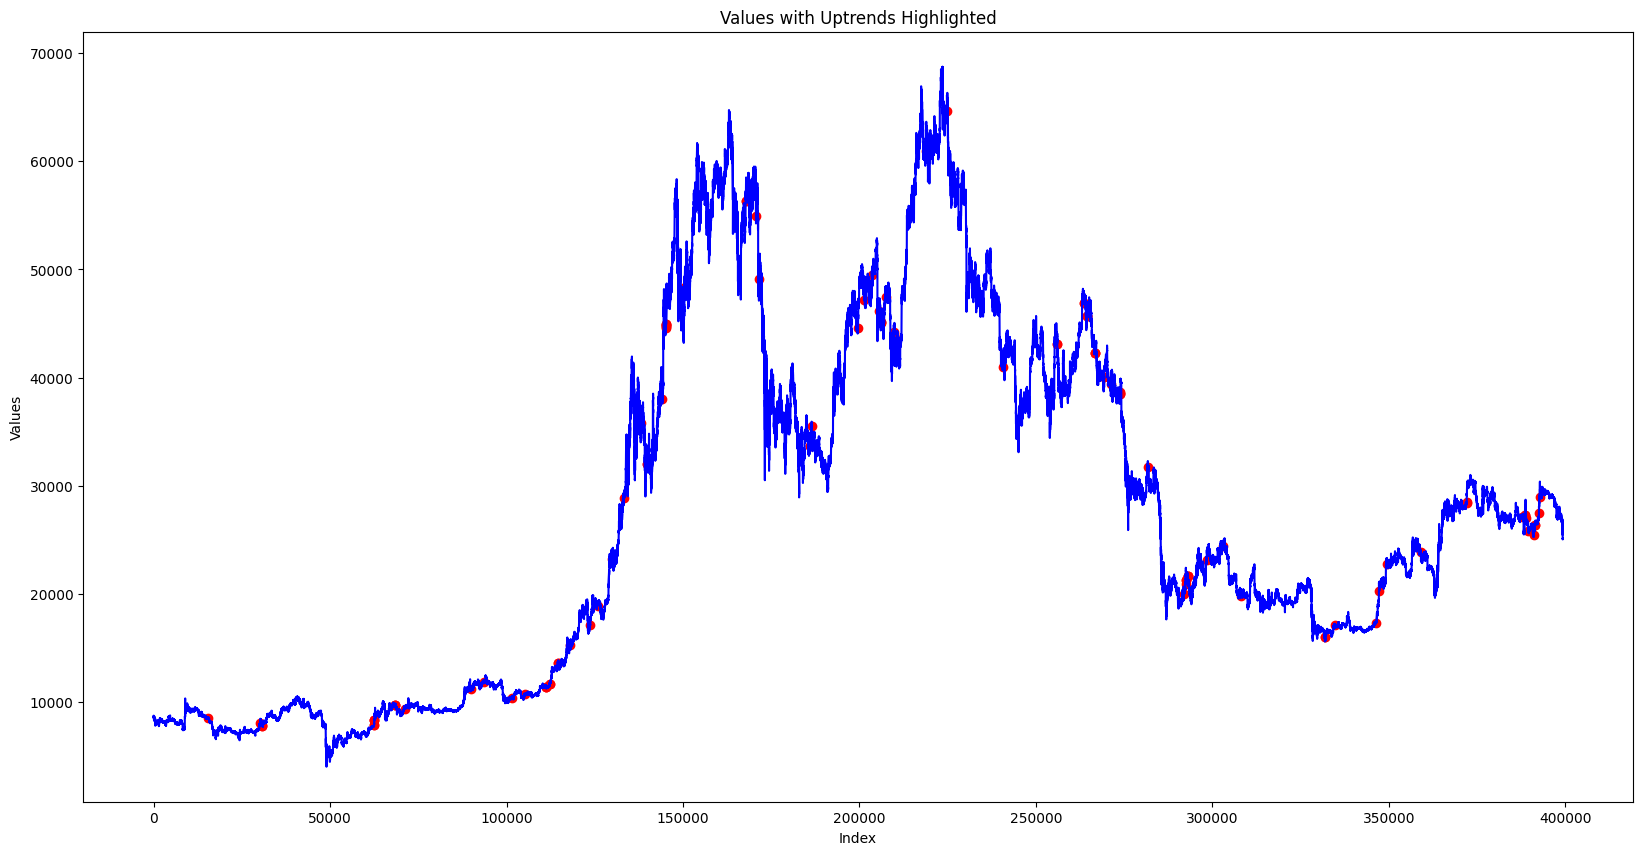

In [140]:
# Plot the entire series
plt.figure(figsize=(20,10))
plt.plot(full_df['close'], label='Values', color='blue')
# Overlay uptrends in a different color
uptrend_indices = full_df[full_df['trend_close'] == True].index
plt.scatter(uptrend_indices, full_df['close'].loc[uptrend_indices], color='red', label='Uptrend')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Values with Uptrends Highlighted')


Simple trend detection with a 10-window lookback period, since we this is the 5m chart, its a 50 minute lookback

What happens if we use a longer lookback? Like 1 month, and calculate our momentum using the method described in "Quantitative Momentum"
$$
(\prod_{n=1}^{5*12*30} 1+return(n-1,n))-1
$$

This will give us the gross returns for the time series

In [152]:
full_df['close_change_pct'] = full_df['close'].pct_change()

In [153]:
full_df

,level_0,index,open,high,low,close,volume,quote_volume,close_change,open_change,positive_close,positive_open,trend_close,trend_open,close_change_pct
0,0,0,8548.70,8637.76,8548.70,8628.42,0.202100,1737.614200,NaN,NaN,False,False,False,False,NaN
1,1,1,8638.78,8646.56,8625.83,8625.83,0.018900,163.175600,-2.59,90.08,False,True,False,False,-0.000300
2,2,2,8588.22,8591.65,8588.22,8591.65,0.033354,286.501900,-34.18,-50.56,False,False,False,False,-0.003963
3,3,3,8605.05,8631.37,8595.12,8631.37,0.521172,4490.021600,39.72,16.83,True,True,False,False,0.004623
4,4,4,8631.37,8631.37,8631.37,8631.37,0.000000,0.000000,0.00,26.32,False,True,False,False,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399248,399248,31,25301.01,25468.59,25101.01,25101.01,2.758760,69555.219855,-200.00,-198.99,False,False,False,False,-0.007905
399249,399249,32,25101.01,26459.02,25001.00,25196.00,6.245420,158555.791356,94.99,-200.00,True,False,False,False,0.003784
399250,399250,33,25241.24,25493.65,25001.02,25115.01,2.081300,52313.419493,-80.99,140.23,False,True,False,False,-0.003214
399251,399251,34,25199.29,25241.24,25000.00,25025.00,2.830070,70992.712009,-90.01,-41.95,False,False,False,False,-0.003584


In [154]:
larger_window = full_df['close_change_pct'].rolling(window=18, min_periods=18).apply(np.prod)

In [155]:
larger_window

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
              ...     
399248    5.315879e-52
399249    2.879815e-51
399250    1.305568e-49
399251   -2.997171e-49
399252   -6.117551e-49
Name: close_change_pct, Length: 399253, dtype: float64

The changes are too small on such a timeframe

In [196]:
full_df['index'] = full_df.index

In [197]:
# Used to turn the 5m candles into 1 hour
agg_dict = {
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
}

In [198]:
hour_close_df = full_df.groupby(full_df['index']//12).agg(agg_dict)

Try with the past 3 hours

In [246]:
hour_close_df['pct_change'] = hour_close_df['close'].pct_change()*100
hour_close_df

,open,high,low,close,volume,pct_change
index,,,,,,
0,8548.70,8722.15,8548.70,8722.15,2.592735,NaN
1,8722.15,8722.15,8672.94,8700.93,0.518017,-0.243289
2,8703.38,8723.64,8612.28,8612.28,0.768822,-1.018857
3,8633.96,8638.05,8581.19,8581.19,0.718755,-0.360996
4,8596.48,8596.48,8416.85,8488.30,1.040230,-1.082484
...,...,...,...,...,...,...
33267,25620.70,26499.39,25475.00,25950.01,7.781300,1.298692
33268,25950.00,26014.12,25475.00,25520.00,7.027680,-1.657071
33269,25520.00,25931.41,25500.00,25649.75,6.448080,0.508425


In [252]:
momentum_score = (hour_close_df['pct_change']+1).rolling(window=24).apply(np.prod)-1

The momentum score is the percent returns in the time period

In [253]:
momentum_score

index
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
33267   -0.513383
33268   -1.653487
33269   -1.744500
33270    0.560904
33271    0.870849
Name: pct_change, Length: 33272, dtype: float64

Text(0.5, 1.0, 'Values with Momentum')

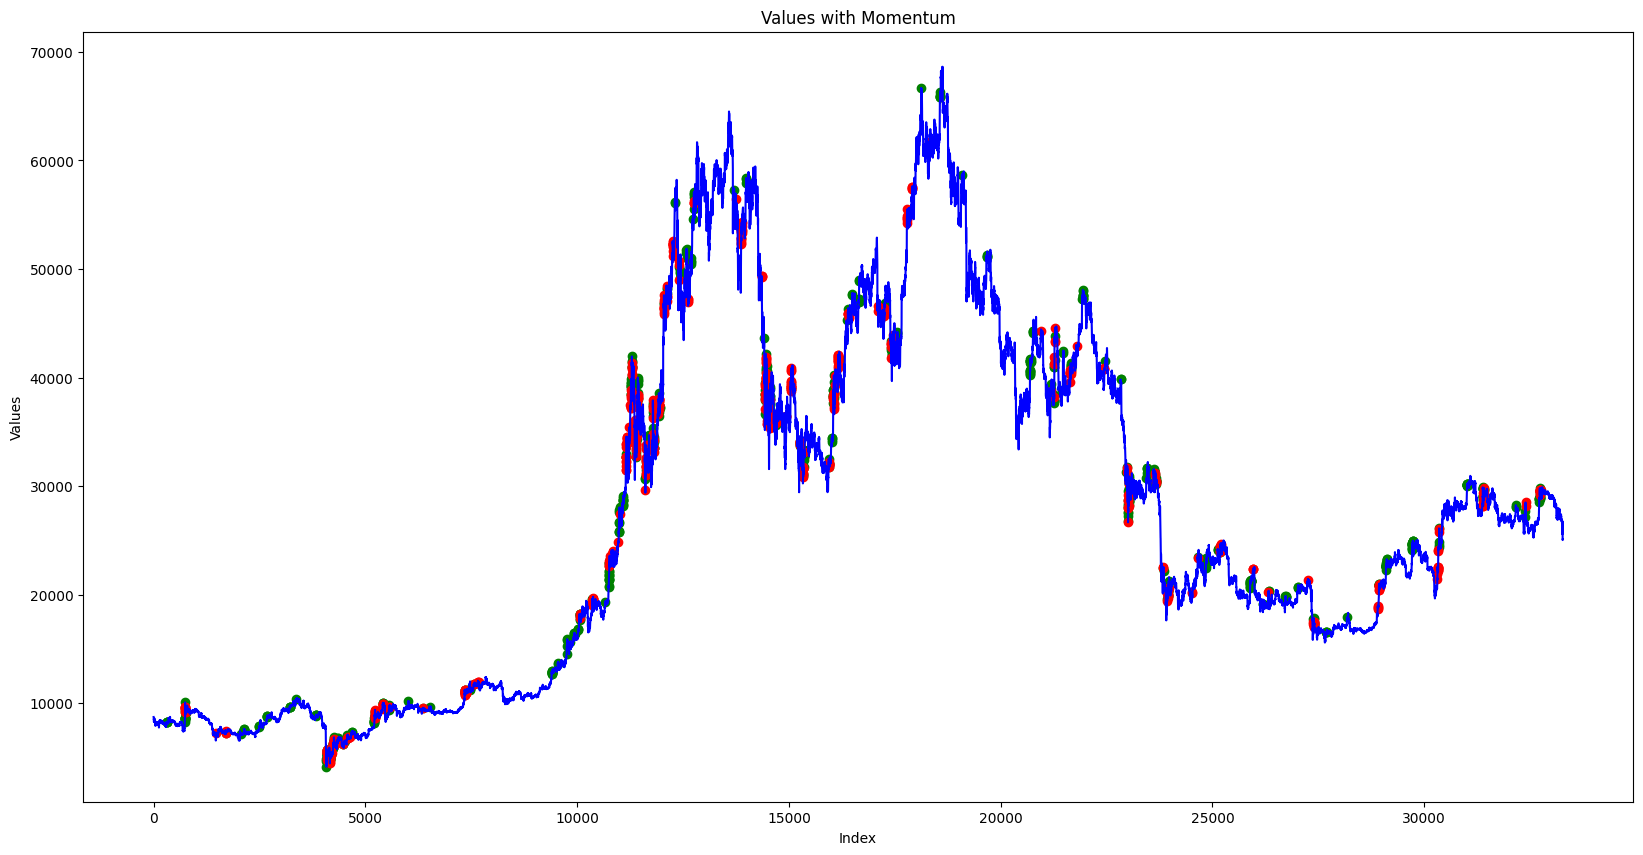

In [256]:
percent_gain = 20
plt.figure(figsize=(20,10))
plt.plot(hour_close_df['close'], label='Values', color='blue')
# Overlay uptrends in a different color
high_positive_momentum = momentum_score[momentum_score>percent_gain].index
plt.scatter(high_positive_momentum, hour_close_df['close'].loc[high_positive_momentum], color='green', label='Positive Momentum')

high_negative_momentum = momentum_score[momentum_score<(-percent_gain)].index
plt.scatter(high_negative_momentum, hour_close_df['close'].loc[high_negative_momentum], color='red', label='Negative Momentum')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Values with Momentum')